In [10]:
# Feel free to add dependencies, but make sure that they are included in environment.yml

#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import altair as alt
from altair import datum
alt.data_transformers.disable_max_rows()

from sklearn import manifold
from openTSNE import TSNE
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

<h1>Read excel file</h1>

In [4]:
# Install this to be able to use pd.read_excel
# pip install openpyxl

In [5]:
# Load dataset
# data = pd.read_excel('merged_games_with_scores.xlsx') # old, not yet final dataset
data = pd.read_excel('merged_games_with_scores_final.xlsx')

# Selecting only the board state columns for dimensionality reduction
board_state_columns = data.loc[:, 'aa':'ss']
# player_info_columns for merged_games_with_scores.xlsx
# player_info_columns = data[['game_id', 'move_id', 'color', 'our_players_color', 'winner_color', 'winner_score', 'result', 'rules', 'handicap', 'starter_player', 'step_count', 'level', 'Rank', 'Area score', 'Area score of opponent', 'Area_winner_color', 'Area result', 'Territory score', 'Territory score of opponent', 'Territory_winner_color', 'Territory result']]  

# player_info_columns for merged_games_with_scores_final.xlsx
player_info_columns = data[['game_id', 'move_id', 'color', 'winner_color', 'winner_score', 'result', 'rules', 'handicap', 'starter_player', 'step_count', 'level', 'Rank', 'Area score', 'Area score of opponent', 'Area_winner_color', 'Area_result', 'Territory_score', 'Territory_score_of_opponent', 'Territory_winner_color', 'Territory_result']]  


In [6]:
board_state_columns

,aa,ab,ac,ad,ae,af,ag,ah,ai,aj,...,sj,sk,sl,sm,sn,so,sp,sq,sr,ss
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9751,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9752,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
player_info_columns

,game_id,move_id,color,winner_color,winner_score,result,rules,handicap,starter_player,step_count,level,Rank,Area score,Area score of opponent,Area_winner_color,Area_result,Territory_score,Territory_score_of_opponent,Territory_winner_color,Territory_result
0,1,1,white,white,Time,score,Japanese,4,white,105,1,53,54.5,56.0,B,"1,5",4.5,3.0,W,"1,5"
1,1,2,black,white,Time,score,Japanese,4,white,105,1,53,54.5,56.0,B,"1,5",4.5,3.0,W,"1,5"
2,1,3,white,white,Time,score,Japanese,4,white,105,1,53,54.5,56.0,B,"1,5",4.5,3.0,W,"1,5"
3,1,4,black,white,Time,score,Japanese,4,white,105,1,53,54.5,56.0,B,"1,5",4.5,3.0,W,"1,5"
4,1,5,white,white,Time,score,Japanese,4,white,105,1,53,54.5,56.0,B,"1,5",4.5,3.0,W,"1,5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9750,44,86,black,white,NaN,resign,Japanese,5,white,90,1,38,0.5,361.0,B,"360,5",0.5,356.0,B,"355,5"
9751,44,87,white,white,NaN,resign,Japanese,5,white,90,1,38,0.5,361.0,B,"360,5",0.5,356.0,B,"355,5"
9752,44,88,black,white,NaN,resign,Japanese,5,white,90,1,38,0.5,361.0,B,"360,5",0.5,356.0,B,"355,5"
9753,44,89,white,white,NaN,resign,Japanese,5,white,90,1,38,0.5,361.0,B,"360,5",0.5,356.0,B,"355,5"


<h1>PCA</h1>

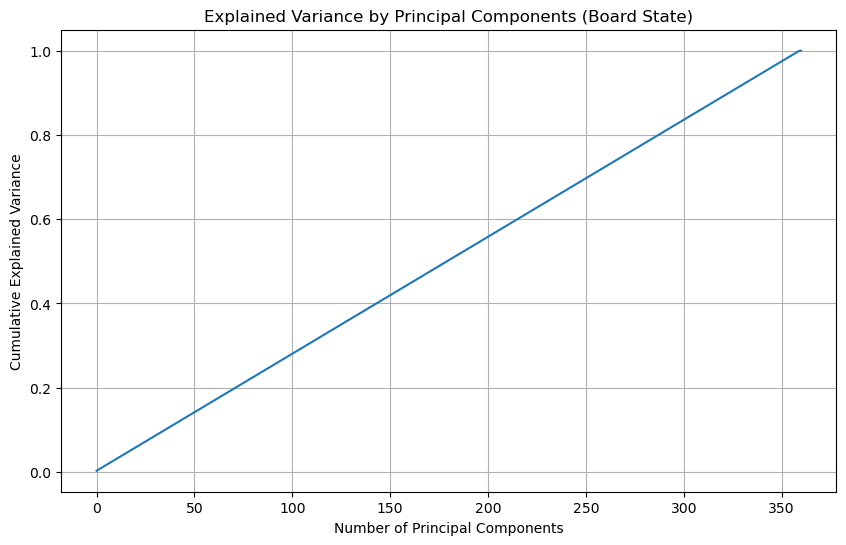

Explained variance by each component: [0.00278106 0.00278098 0.00278027 0.00277979 0.00277972 0.00277971
 0.00277958 0.00277955 0.00277954 0.00277947 0.00277943 0.00277942
 0.00277935 0.00277931 0.00277928 0.00277927 0.00277925 0.00277924
 0.00277922 0.0027792  0.00277911 0.00277907 0.00277907 0.00277904
 0.00277901 0.002779   0.00277899 0.00277898 0.00277895 0.00277894
 0.00277892 0.00277891 0.00277888 0.00277888 0.00277887 0.00277884
 0.00277884 0.00277883 0.0027788  0.0027788  0.0027788  0.00277879
 0.00277878 0.00277877 0.00277876 0.00277874 0.00277874 0.00277874
 0.00277873 0.00277872 0.00277871 0.0027787  0.00277869 0.00277869
 0.00277864 0.00277859 0.00277856 0.00277856 0.00277854 0.00277845
 0.00277845 0.00277844 0.00277844 0.00277843 0.0027784  0.00277836
 0.00277836 0.00277836 0.00277835 0.00277832 0.00277832 0.00277832
 0.00277832 0.0027783  0.00277829 0.00277829 0.00277827 0.00277825
 0.00277822 0.00277821 0.0027782  0.00277819 0.00277817 0.00277816
 0.00277813 0.00277813 0

In [8]:
# Standardize the board state data
scaler = StandardScaler()
board_state_scaled = scaler.fit_transform(board_state_columns)

# Apply PCA to the board state columns
pca = PCA()
board_state_pca = pca.fit_transform(board_state_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components (Board State)')
plt.grid(True)
plt.show()

# Checking how many components explain a significant amount of variance
explained_variance = pca.explained_variance_ratio_

# Summary of PCA
print(f"Explained variance by each component: {explained_variance}")
print(f"Total explained variance: {np.cumsum(explained_variance)}")


<h5>It doesn't make any sense to use PCA on the board states, as no feature (in this case board position) seems to be more important than the others.</h5>

C:\Users\jpetr\AppData\Local\Temp\ipykernel_20236\3913686458.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_info_columns[feature] = pd.to_numeric(player_info_columns[feature], errors='coerce')
C:\Users\jpetr\AppData\Local\Temp\ipykernel_20236\3913686458.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_info_columns[numerical_features] = player_info_columns[numerical_features].fillna(



Most important features for each principal component:

Principal Component 1:
  Territory_score_of_opponent: 0.4388
  Area score of opponent: 0.4189
  Area score: -0.4084
  Territory_result: 0.3666
  Area_result: 0.3662
  Territory_score: -0.3210
  level_1: 0.1550
  step_count: 0.1073
  winner_color_black: 0.0790
  winner_color_white: -0.0790

Principal Component 2:
  handicap: 0.4733
  Territory_score: -0.4130
  Territory_result: -0.4058
  Area_result: -0.4036
  Area score: -0.3145
  Area score of opponent: 0.1806
  level_3: -0.1277
  starter_player_black: -0.1264
  starter_player_white: 0.1264
  result_resign: 0.1240

Principal Component 3:
  step_count: 0.6410
  Area score of opponent: 0.2624
  handicap: -0.2428
  Area_winner_color_W: 0.2344
  Area_winner_color_B: -0.2344
  starter_player_white: -0.2170
  starter_player_black: 0.2170
  Territory_winner_color_B: -0.2135
  Territory_winner_color_W: 0.2135
  rules_Japanese: -0.1726

Principal Component 4:
  handicap: 0.5868
  starter_

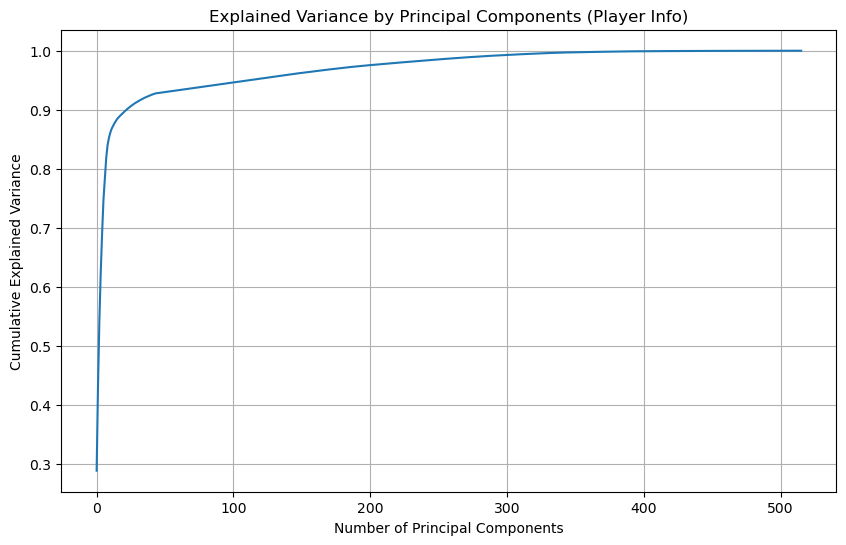

In [9]:
# !!!! winner_score and Rank are excluded here!!!!
# feature names in merged_games_with_scores.xlsx
"""
numerical_features = ['handicap', 'step_count', 
                      'Area score', 'Area score of opponent', 'Area result', 'Territory score', 
                      'Territory score of opponent', 'Territory result']
categorical_features = ['game_id', 'move_id', 'color', 'our_players_color', 
                        'winner_color', 'result', 'rules', 'starter_player', 
                        'level', 'Area_winner_color', 'Territory_winner_color']
"""

# feature names in merged_games_with_scores_final.xlsx
numerical_features = ['handicap', 'step_count', 
                      'Area score', 'Area score of opponent', 'Area_result', 'Territory_score', 
                      'Territory_score_of_opponent', 'Territory_result']
categorical_features = ['game_id', 'move_id', 'color', 
                        'winner_color', 'result', 'rules', 'starter_player', 
                        'level', 'Area_winner_color', 'Territory_winner_color']

# Converting numerical features to numeric (int/float)
for feature in numerical_features:
    player_info_columns[feature] = pd.to_numeric(player_info_columns[feature], errors='coerce')

# Handling any NaN values that result from conversion
# For example, filling NaN values with the mean of the column
player_info_columns[numerical_features] = player_info_columns[numerical_features].fillna(
    player_info_columns[numerical_features].mean()
)

# Preprocessing: One-Hot Encoding for categorical features and Standardization for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Create a pipeline for PCA
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA())
])

# Apply PCA to the player info columns
player_info_pca = pipeline.fit_transform(player_info_columns)

# Extract PCA component and explained variance
pca = pipeline.named_steps['pca']
explained_variance = pca.explained_variance_ratio_

# Get feature names from the preprocessor
# Note: OneHotEncoder generates multiple columns for each category, so we need to extract all feature names
onehot_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(onehot_feature_names)

# Analyze the PCA components to see the most important features
pca_components = pca.components_

# Print out the most important features for each principal component
print("\nMost important features for each principal component:\n")
for i, component in enumerate(pca_components):
    # Get the top features for this component, sorted by the absolute value of their loadings
    important_features = sorted(zip(all_feature_names, component), key=lambda x: abs(x[1]), reverse=True)
    print(f"Principal Component {i + 1}:")
    for feature, loading in important_features[:10]:  # Print top 10 features for each component
        print(f"  {feature}: {loading:.4f}")
    print()

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components (Player Info)')
plt.grid(True)
plt.show()

<h3>These results are for our old dataset (merged_games_with_scores.xlsx)</h3>
<h4>PC 1 - focuses on overall scoring metrics</h4>
The score-related features (Area score, Territory score, and their opponent counterparts) seem highly important. --> they affect game outcomes or player performance most significantly (of course :D )

<h4>PC 2 - focuses on progression of the game</h4>
!!!!! The step_count and handicap features are crucial here. Consider analyzing how the length of the game and the handicap setting influence the strategies and scores of players.

<h4>PC 3 - focuses on the initial game conditions</h4>
!!!!!Handicap and the identity of the starter_player (black or white) are important features to analyze. Investigate how initial conditions and starting player influence the final scores and outcomes.

<h4>PC 4 - focuses on territorial aspects of the game</h4>
!!!!!Analyzing territory-based strategies and how they interact with initial game conditions (like handicap) could provide deeper insights into player performance.

<h4>PC 5 - focuses on game progression and duration</h4>
!!!!!Investigating how game duration affects strategic decisions and whether certain player levels or ranks are associated with longer, more strategically complex games could yield interesting findings.

<h3>These results are for our final dataset (merged_games_with_scores_final.xlsx)</h3>
<h4>PC 1 - on opponent and game outcome</h4>
!!!!!The inclusion of level_1 indicates that there could be a specific level effect, possibly influencing or being influenced by these score metrics.

<h4>PC 2 - focuses on handicap and game outcomes</h4>
This component emphasizes handicap settings and their impact on the final game outcomes. The handicap feature has a strong positive loading, suggesting that it plays a crucial role in game dynamics.
The negative relationship between Territory_score, Territory_result, and Area_result indicates that higher handicaps might negatively affect the territory-based outcomes for the player starting with the handicap.
The feature result_resign implies that resignation outcomes might correlate with handicap settings, hinting at games that end prematurely due to significant score discrepancies.

<h4>PC 3 - focuses on step count and player roles</h4>
The relationship between step_count and Area score of opponent suggests that the number of moves made during the game influences or is influenced by the opponent's area score.
The negative and positive loadings of starter_player_white and starter_player_black reflect the impact of the starting player on the game dynamics.

<h4>PC 4 - focuses on handicaps and initial conditions of the game</h4>
This component emphasizes initial game conditions, such as handicap and the player who starts the game (starter_player_white or starter_player_black).
The handicap feature having the highest loading suggests that handicap settings are crucial in defining the game's framework and have a ripple effect on other aspects, like step count and score.
The presence of step_count and score-related features (Territory_score, Area score) indicates that initial conditions influence the game's length and the accumulation of scores.
The mixed loadings for starter_player_white and starter_player_black hint at the importance of player roles and how starting as either black or white affects gameplay.

<h4>PC 5 - focuses on step count and winning color</h4>
This component emphasizes the duration of the game (step_count) and the winning color. The high loading on step_count indicates that the length of the game is a critical factor in the outcomes.
The winner_color_white and winner_color_black features suggest a correlation between game duration and the color of the winning player.
The Area_winner_color_W, Area_winner_color_B, Territory_winner_color_W, and Territory_winner_color_B features point to the strategic aspects of area and territory control that determine the winner's color. This implies that longer games may have more complex area and territory strategies influencing the final outcome.
Overall, this component captures the strategic depth of longer games and how different player levels or strategies might be associated with game duration and winning color.

Length of pca_index: 9755
Length of player_info_pca: 9755
Checks begin here...
[1 2 3 0]
level
2    5677
1    2434
3    1016
0     628
Name: count, dtype: int64
[1 2 3 0]
Checks end here.


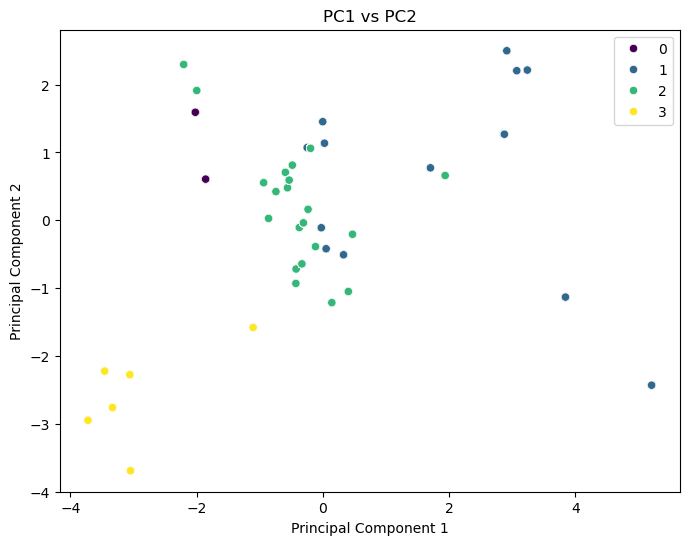

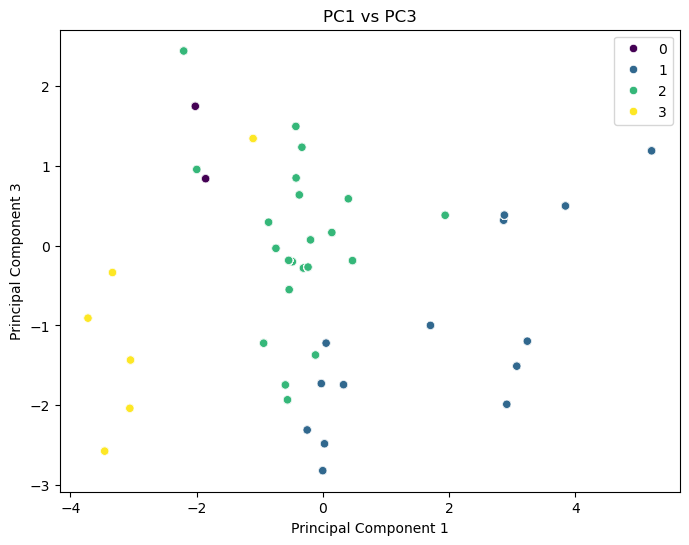

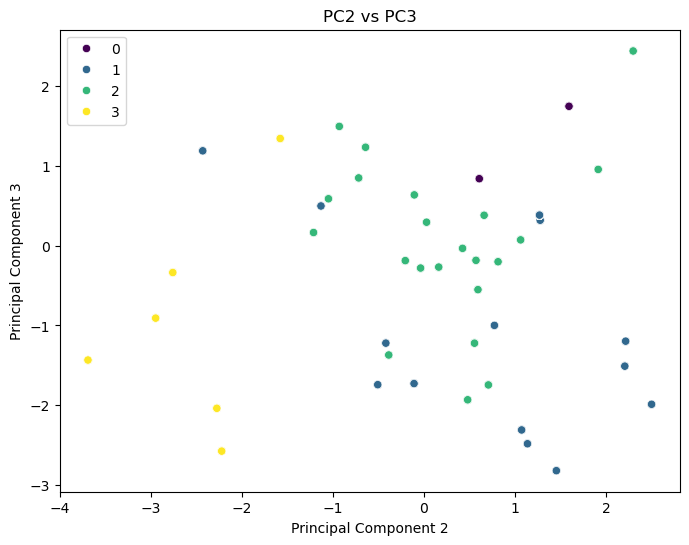

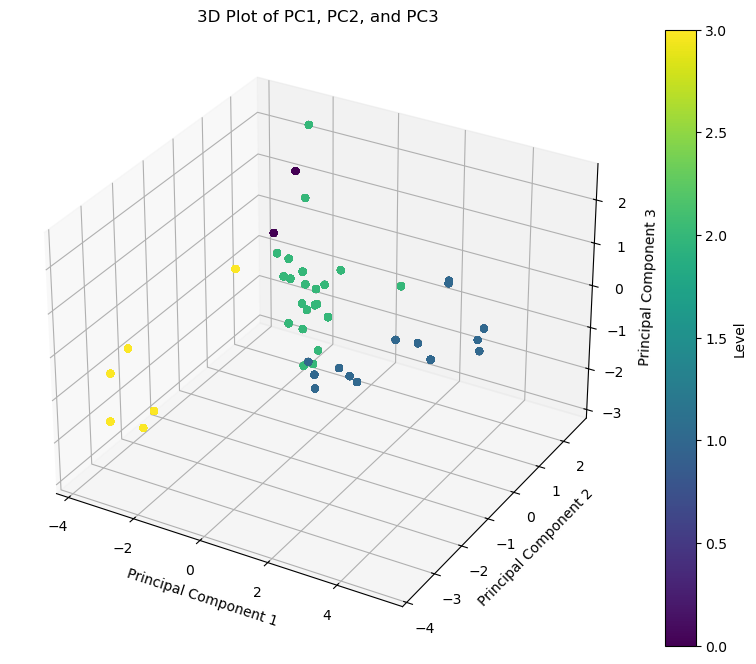

In [29]:
# pca_index corresponds to the entire index of player_info_columns
pca_index = player_info_columns.index

# Check if lengths match
print("Length of pca_index:", len(pca_index))
print("Length of player_info_pca:", len(player_info_pca))

# X_pca_first_3 = pca_components[:, :3]  # Keep only the first 3 columns

# Create a DataFrame for easy handling of PCA components
# pca_df = pd.DataFrame(X_pca_first_3, columns=['PC1', 'PC2', 'PC3'])

# Print pca_df
# print(pca_df)

# Optionally, you can add labels or use some feature for coloring
# For example, using 'winner_color' for coloring (if it's a binary/categorical feature)
# pca_df['level'] = player_info_columns['level'].values  # Adjust to your chosen categorical feature

# Create the pca_df DataFrame using the first 3 principal components
pca_df = pd.DataFrame(player_info_pca[:, :3], columns=['PC1', 'PC2', 'PC3'])

# Use pca_index to get the correct 'level' values from player_info_columns
pca_df['level'] = player_info_columns.loc[pca_index, 'level'].values

# JUST SOME CHECKS
print("Checks begin here...")
print(player_info_columns['level'].unique())
print(player_info_columns['level'].value_counts())
print(pca_df['level'].unique())
print("Checks end here.")

# Plotting PC1 vs PC2
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='level', palette='viridis')
plt.title('PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Plotting PC1 vs PC3
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC3', hue='level', palette='viridis')
plt.title('PC1 vs PC3')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.legend()
plt.show()

# Plotting PC2 vs PC3
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC2', y='PC3', hue='level', palette='viridis')
plt.title('PC2 vs PC3')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.legend()
plt.show()

# 3D Plot of PC1, PC2, and PC3
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['level'], cmap='viridis')
ax.set_title('3D Plot of PC1, PC2, and PC3')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(sc, label='Level')
plt.show()

<h1>t-SNE</h1>

In [43]:
# print preprocessor
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['handicap', 'step_count', 'Area score',
                                  'Area score of opponent', 'Area_result',
                                  'Territory_score',
                                  'Territory_score_of_opponent',
                                  'Territory_result']),
                                ('cat', OneHotEncoder(),
                                 ['game_id', 'move_id', 'color', 'winner_color',
                                  'result', 'rules', 'starter_player', 'level',
                                  'Area_winner_color',
                                  'Territory_winner_color'])])

In [44]:
# print to check how it looks
player_info_columns

,game_id,move_id,color,winner_color,winner_score,result,rules,handicap,starter_player,step_count,level,Rank,Area score,Area score of opponent,Area_winner_color,Area_result,Territory_score,Territory_score_of_opponent,Territory_winner_color,Territory_result
0,1,1,white,white,Time,score,Japanese,4,white,105,1,53,54.5,56.0,B,134.842514,4.5,3.0,W,137.831408
1,1,2,black,white,Time,score,Japanese,4,white,105,1,53,54.5,56.0,B,134.842514,4.5,3.0,W,137.831408
2,1,3,white,white,Time,score,Japanese,4,white,105,1,53,54.5,56.0,B,134.842514,4.5,3.0,W,137.831408
3,1,4,black,white,Time,score,Japanese,4,white,105,1,53,54.5,56.0,B,134.842514,4.5,3.0,W,137.831408
4,1,5,white,white,Time,score,Japanese,4,white,105,1,53,54.5,56.0,B,134.842514,4.5,3.0,W,137.831408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9750,44,86,black,white,NaN,resign,Japanese,5,white,90,1,38,0.5,361.0,B,134.842514,0.5,356.0,B,137.831408
9751,44,87,white,white,NaN,resign,Japanese,5,white,90,1,38,0.5,361.0,B,134.842514,0.5,356.0,B,137.831408
9752,44,88,black,white,NaN,resign,Japanese,5,white,90,1,38,0.5,361.0,B,134.842514,0.5,356.0,B,137.831408
9753,44,89,white,white,NaN,resign,Japanese,5,white,90,1,38,0.5,361.0,B,134.842514,0.5,356.0,B,137.831408


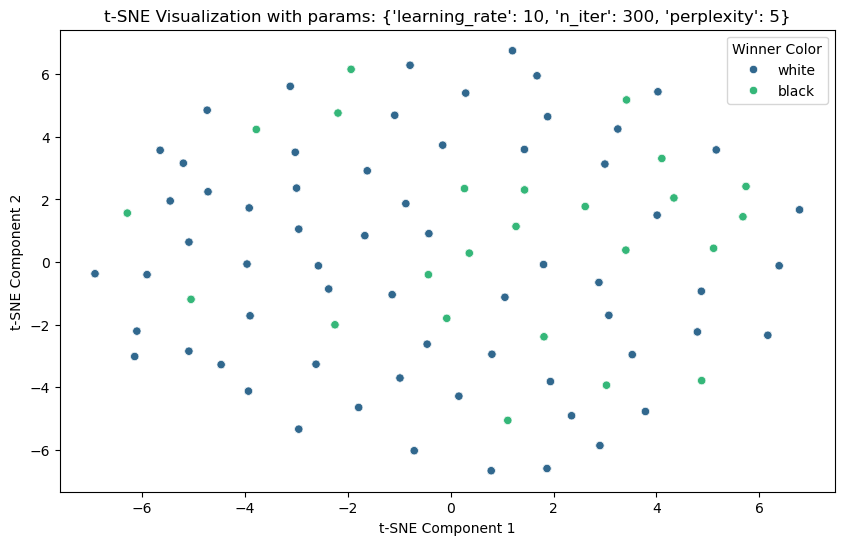

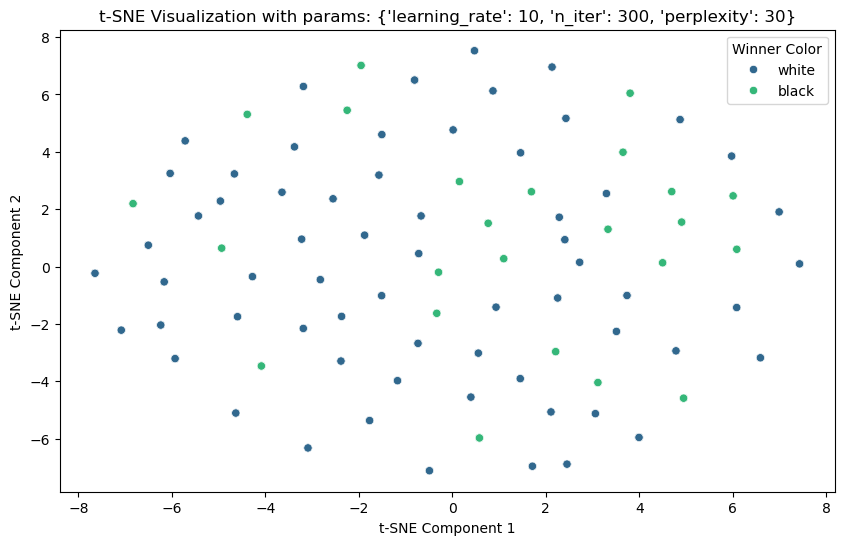

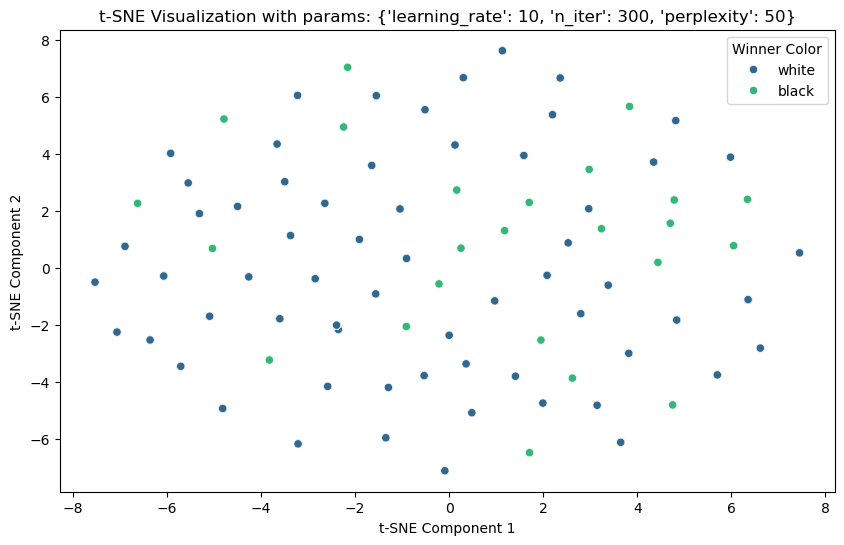

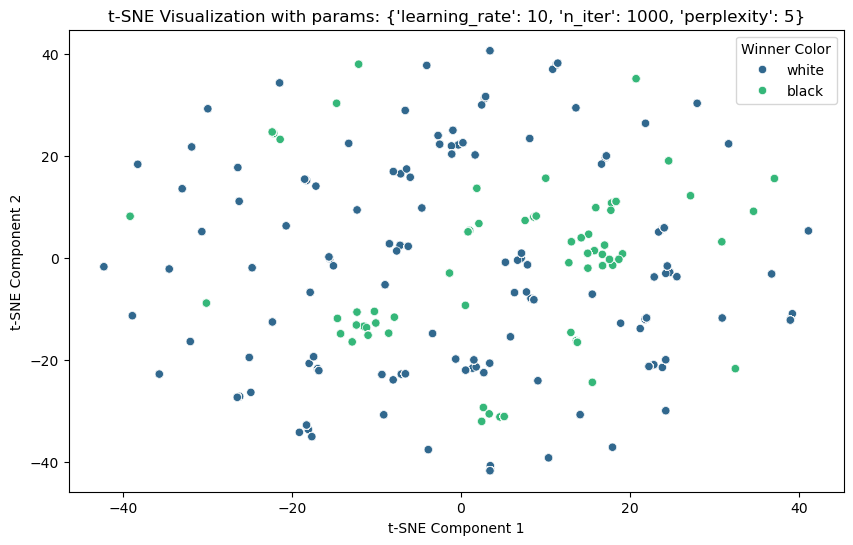

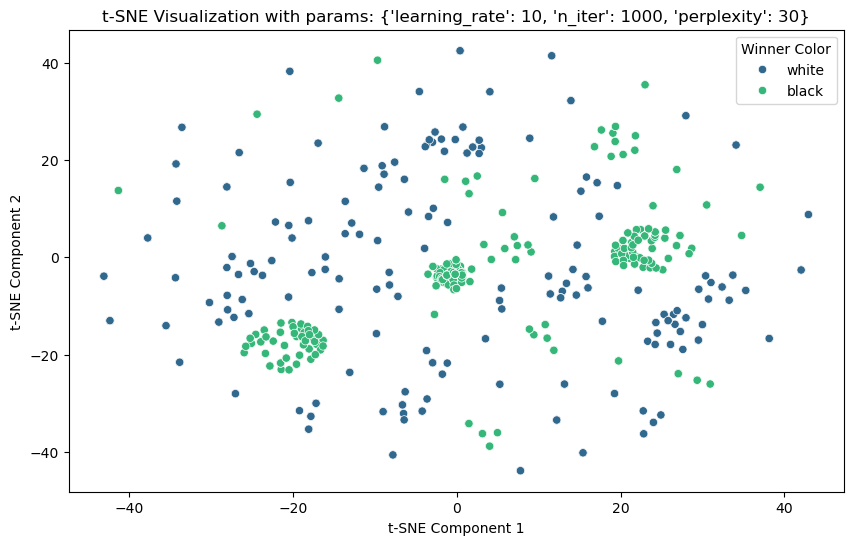

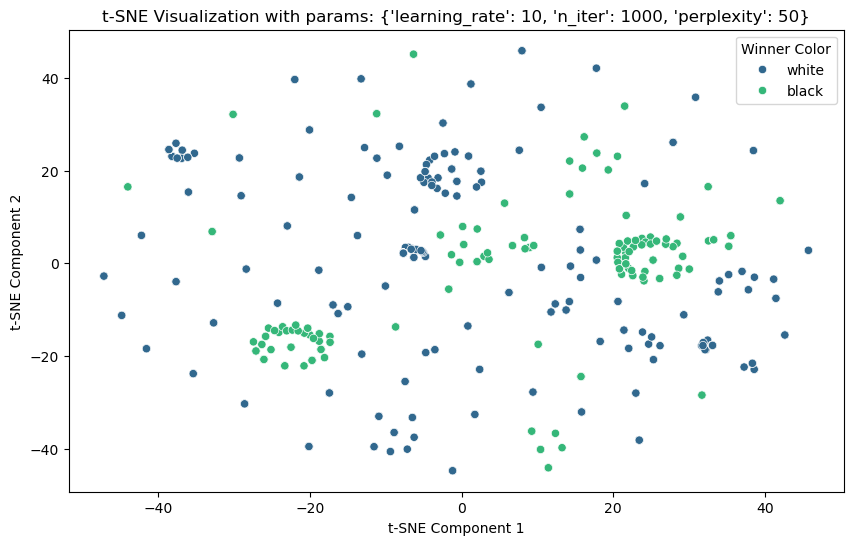

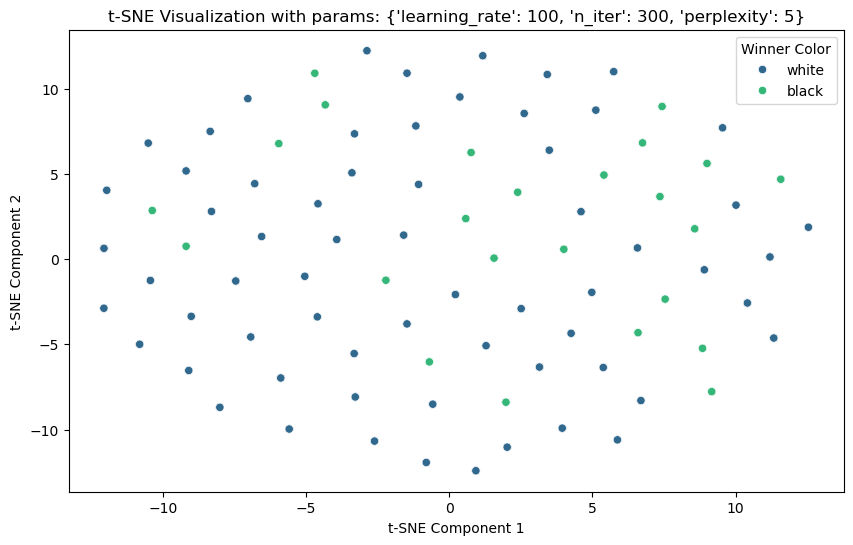

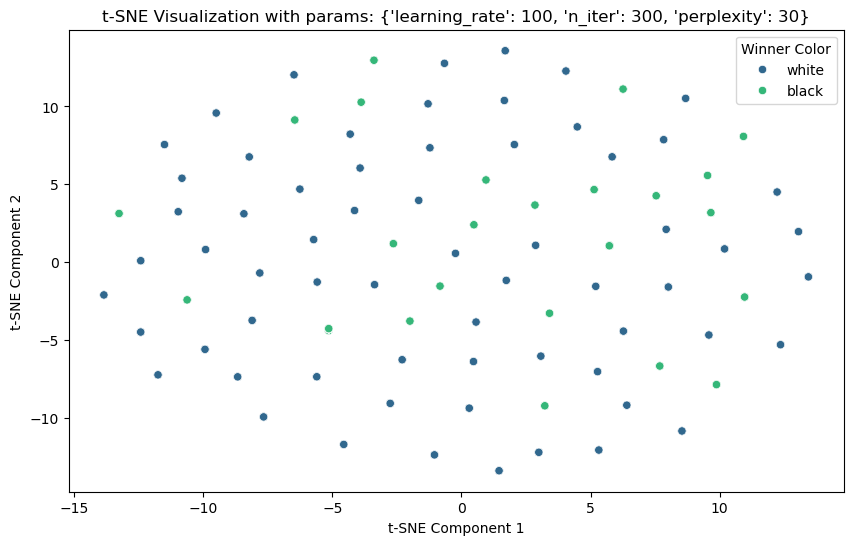

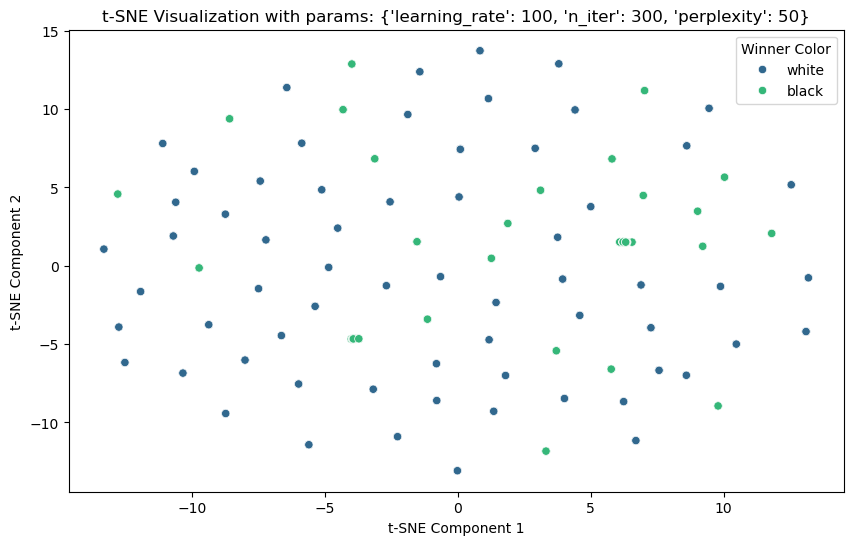

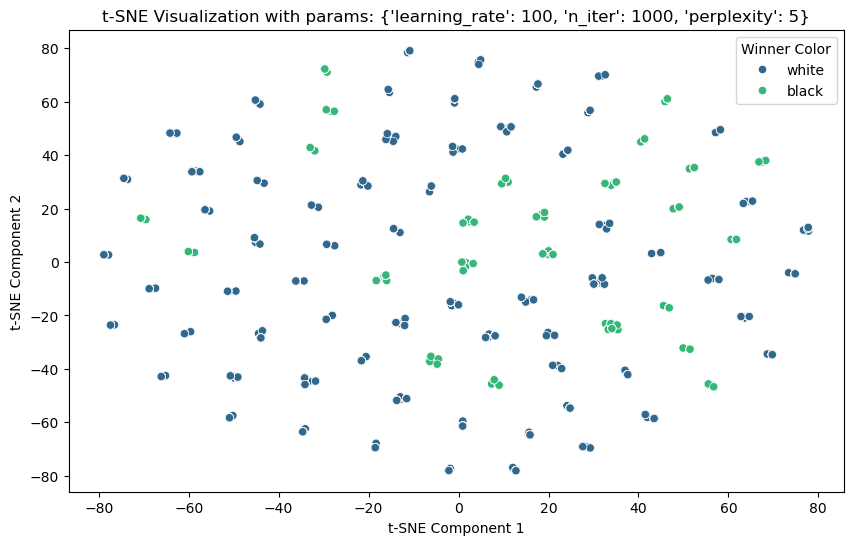

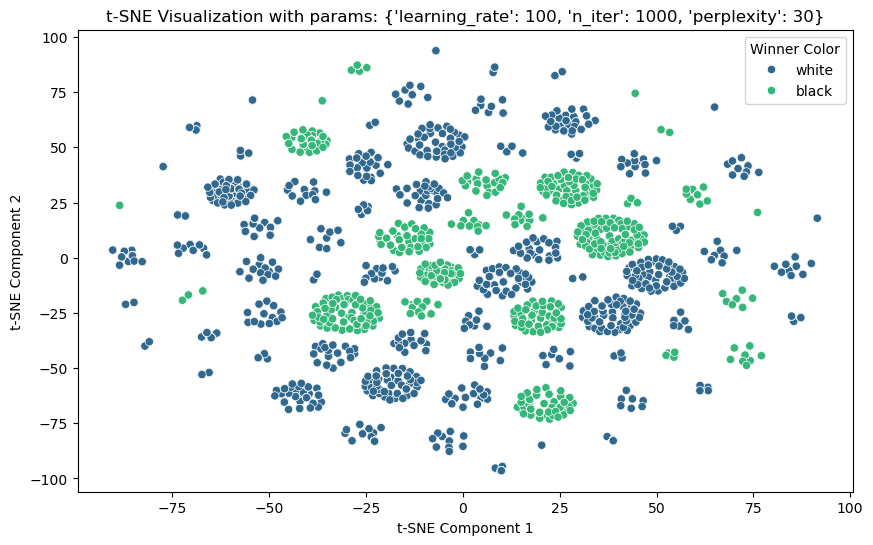

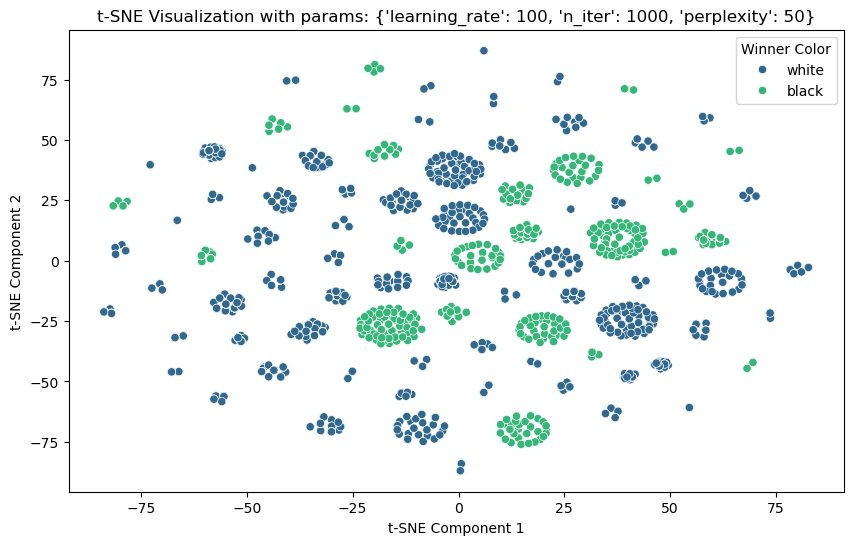

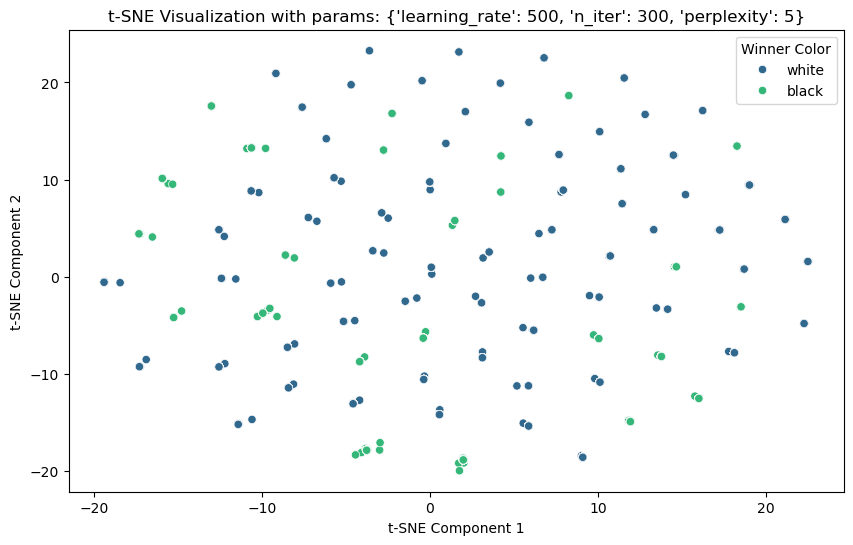

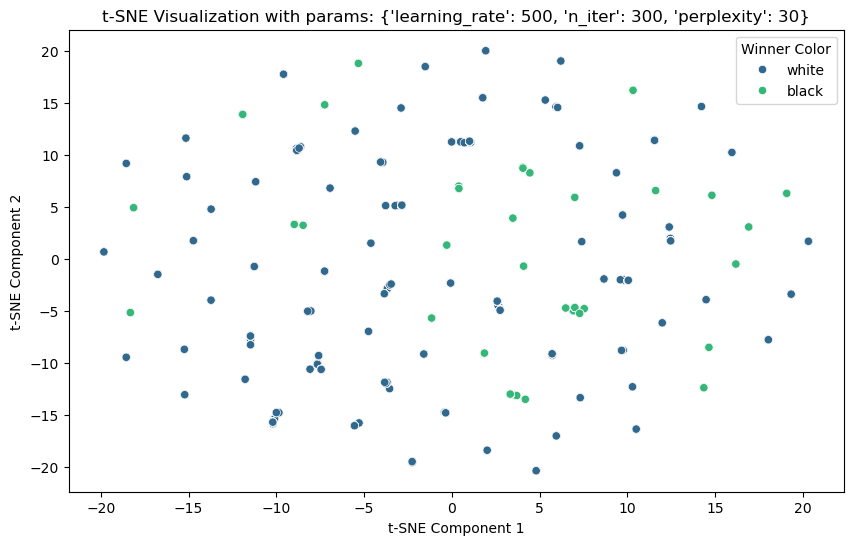

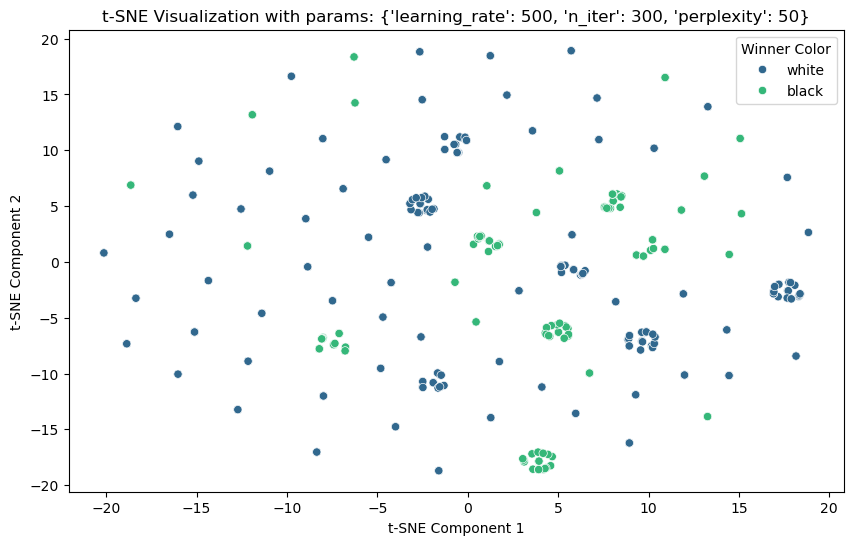

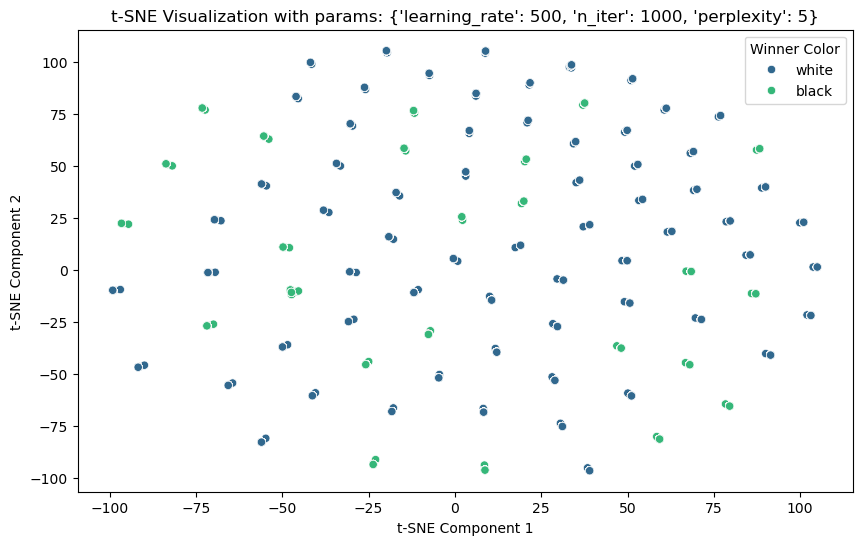

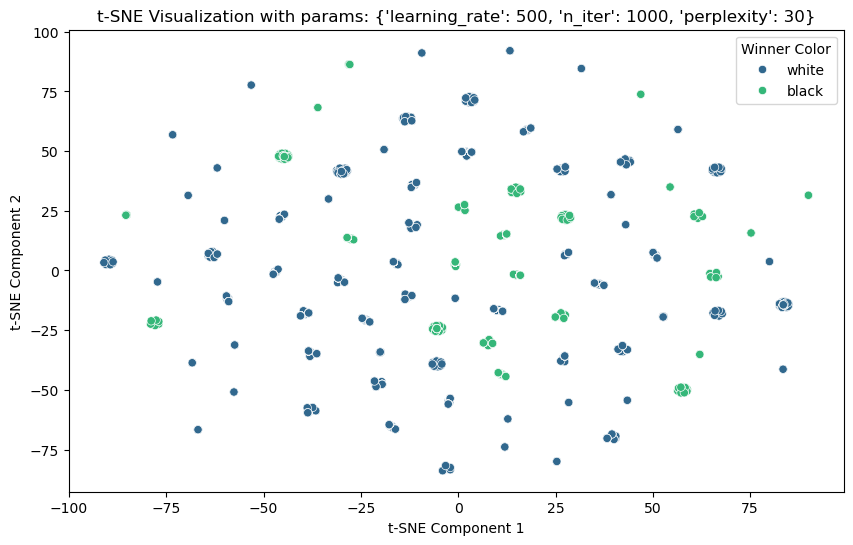

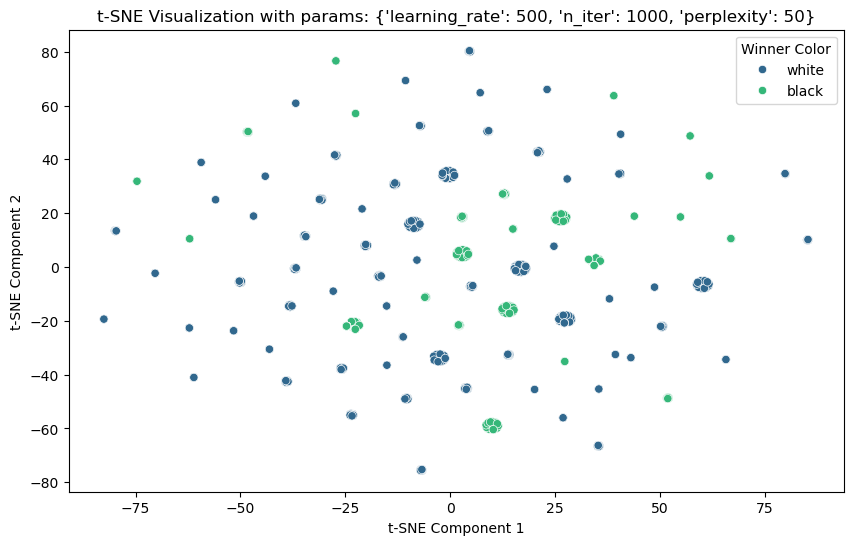

Best t-SNE Parameters: {'learning_rate': 10, 'n_iter': 1000, 'perplexity': 50}
Lowest KL Divergence: -1.778799295425415


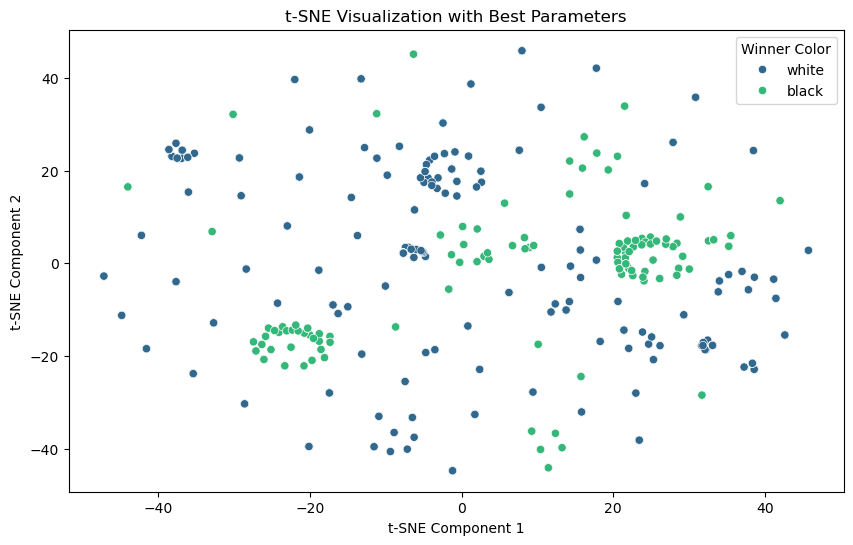

In [45]:
# Apply transformations and convert to a dense matrix
X = preprocessor.fit_transform(player_info_columns).toarray()

# Set up parameter grid for t-SNE
# perplexity: lower perplexity focuses on local structure, while a higher perplexity considers more global relationships.
# learning_rate: This parameter controls the step size during optimization. A suitable learning rate helps the algorithm converge efficiently.
# n_iter: This parameter defines the number of iterations for the optimization algorithm.
# init: This parameter determines how to initialize the low-dimensional embedding.
# metric (not used by us): This parameter specifies the distance metric used to compute pairwise distances between points in the high-dimensional space. Options include 'euclidean', 'cosine', and others
param_grid = {
    'perplexity': [5, 30, 50],  # Typical values are between 5 and 50
    'learning_rate': [10, 100, 500],  # Values between 10 and 1000 can be experimented with
    'n_iter': [300, 1000]  # Number of iterations
}

# Perform grid search
best_params = None
lowest_kl_divergence = float('inf')
X_embedded = None

for params in ParameterGrid(param_grid):
    tsne = TSNE(
        n_components=2,
        perplexity=params['perplexity'],
        learning_rate=params['learning_rate'],
        n_iter=params['n_iter'],
        init='random',  # Use "random" initialization to avoid the sparse matrix issue
        random_state=42
    )
    X_tsne = tsne.fit_transform(X)

    #############
    # Plotting the t-SNE result
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=data['winner_color'], palette='viridis')
    plt.title(f't-SNE Visualization with params: {params}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend(title='Winner Color')
    plt.show()
    ############
    
    # Calculate a metric like KL divergence (inertia, etc.)
    kl_divergence = tsne.kl_divergence_  # Only available in scikit-learn 0.24 or higher
    
    if kl_divergence < lowest_kl_divergence:
        lowest_kl_divergence = kl_divergence
        best_params = params
        X_embedded = X_tsne

# Print best parameters
print("Best t-SNE Parameters:", best_params)
print("Lowest KL Divergence:", lowest_kl_divergence)

# Plotting the t-SNE result with the best params according to the grid search
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=data['winner_color'], palette='viridis')
plt.title('t-SNE Visualization with Best Parameters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Winner Color')
plt.show()

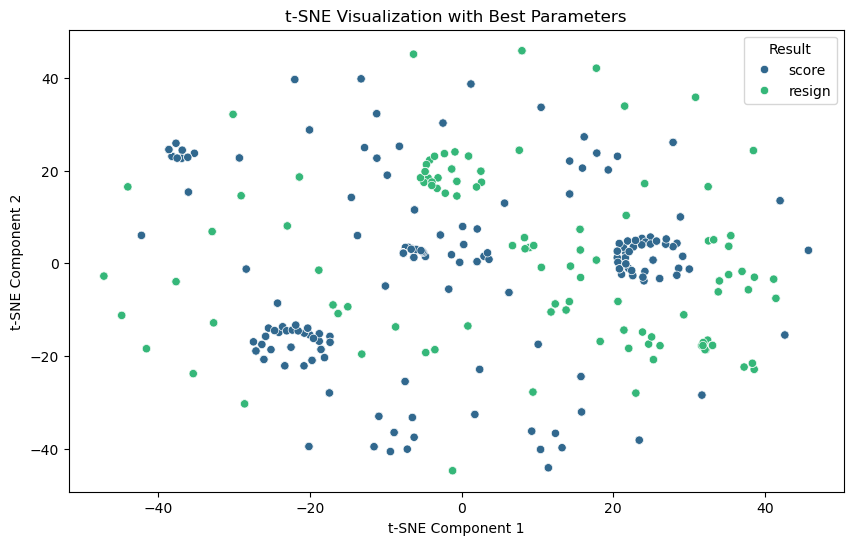

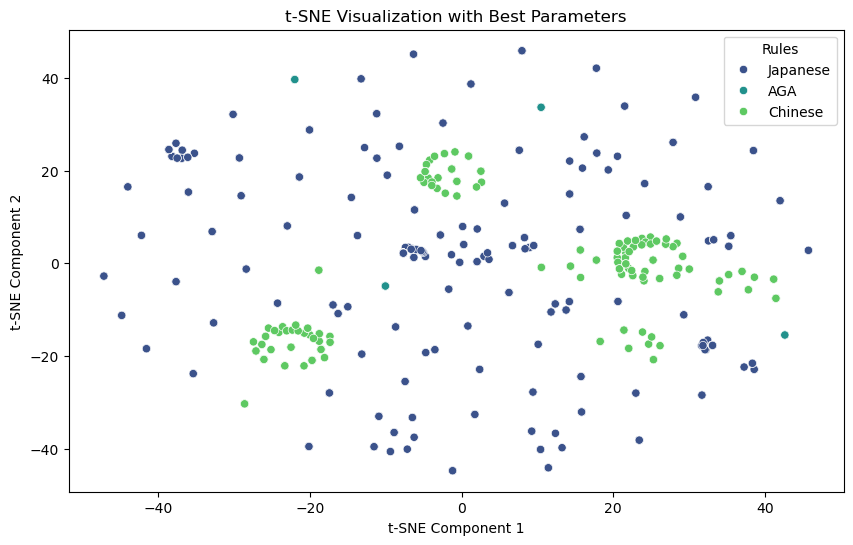

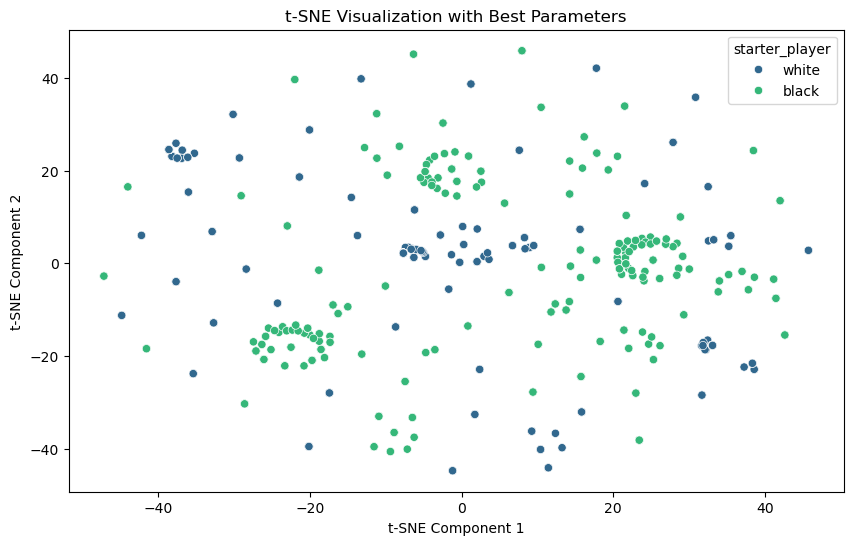

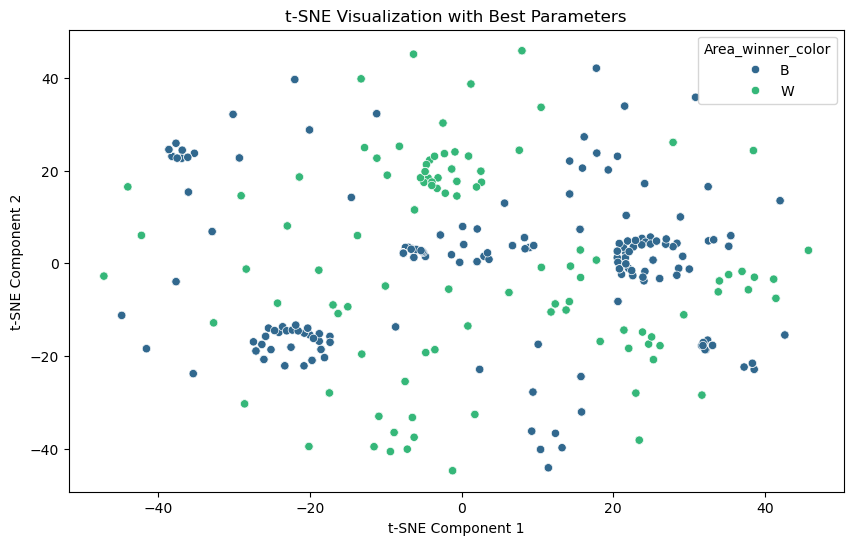

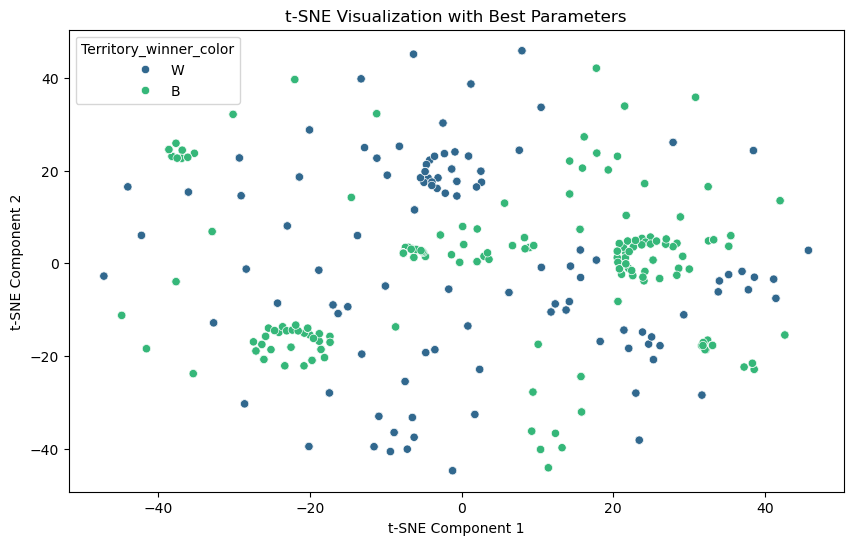

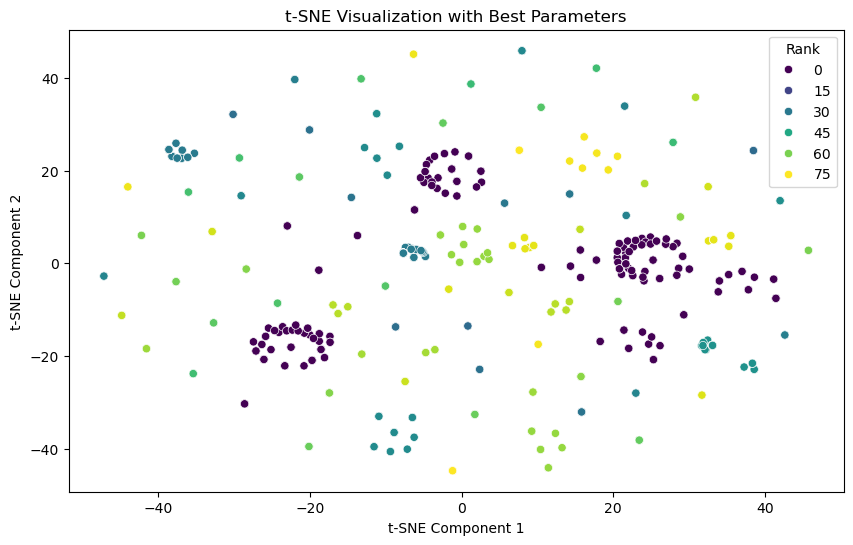

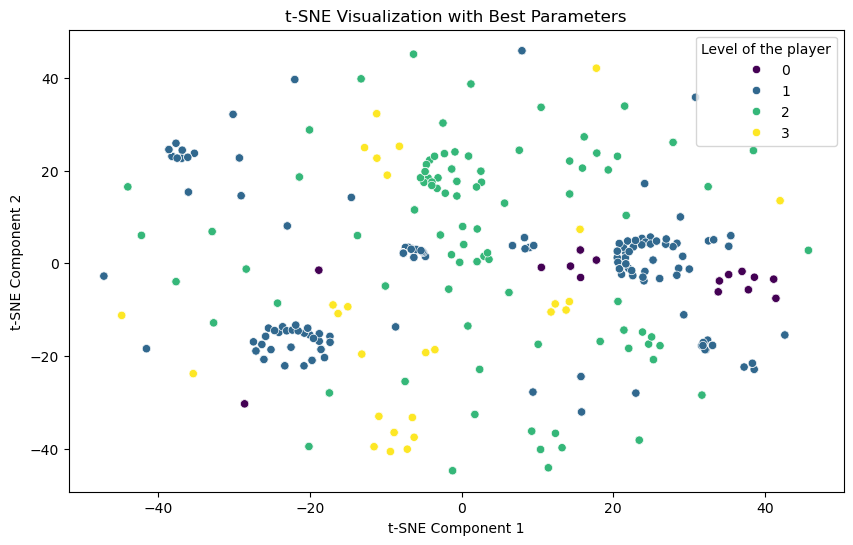

In [46]:
# Experiment with different hues

# Result
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=data['result'], palette='viridis')
plt.title('t-SNE Visualization with Best Parameters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Result')
plt.show()

# Rules
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=data['rules'], palette='viridis')
plt.title('t-SNE Visualization with Best Parameters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Rules')
plt.show()

# starter_player
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=data['starter_player'], palette='viridis')
plt.title('t-SNE Visualization with Best Parameters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='starter_player')
plt.show()

# Area_winner_color
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=data['Area_winner_color'], palette='viridis')
plt.title('t-SNE Visualization with Best Parameters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Area_winner_color')
plt.show()

# Territory_winner_color
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=data['Territory_winner_color'], palette='viridis')
plt.title('t-SNE Visualization with Best Parameters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Territory_winner_color')
plt.show()

# Rank
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=data['Rank'], palette='viridis')
plt.title('t-SNE Visualization with Best Parameters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Rank')
plt.show()

# level
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=data['level'], palette='viridis')
plt.title('t-SNE Visualization with Best Parameters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Level of the player')
plt.show()

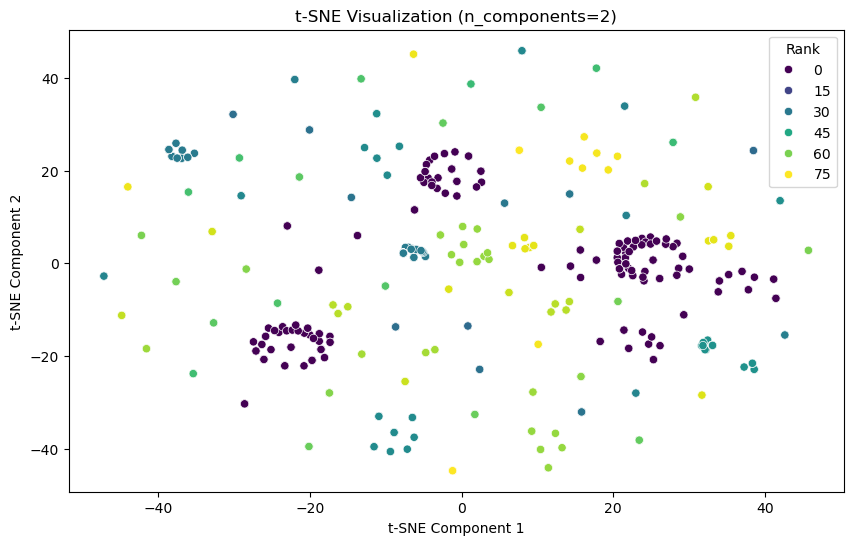

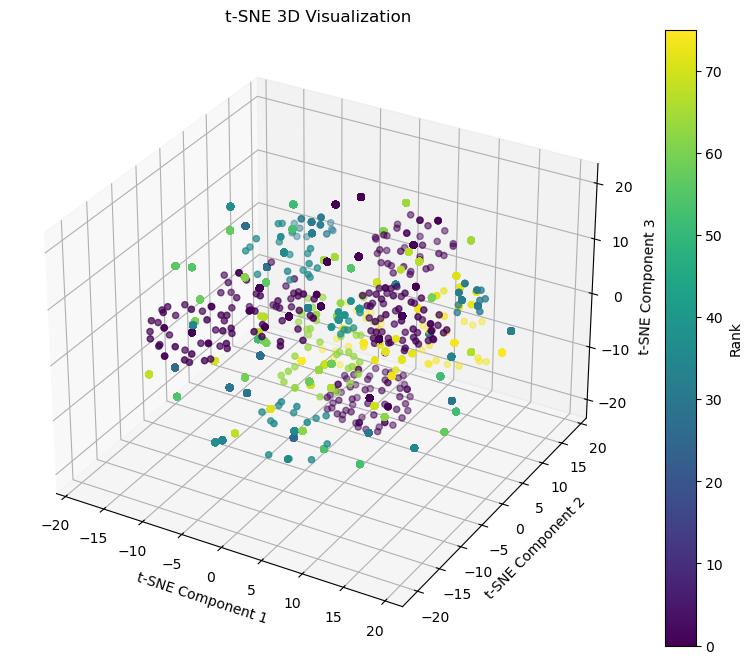

In [47]:
# Experiment with different n_components (but the hue is the Rank here)

for n_components in [2, 3]: # it should be less than 4, otherwise ValueError: 'n_components' should be inferior to 4 for the barnes_hut algorithm as it relies on quad-tree or oct-tree.
    tsne = TSNE(
        n_components=n_components,
        perplexity=best_params['perplexity'],
        learning_rate=best_params['learning_rate'],
        n_iter=best_params['n_iter'],
        init='random',
        random_state=42
    )
    
    X_tsne = tsne.fit_transform(X)
    
    # For 2D Plot
    if n_components == 2:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=data['Rank'], palette='viridis')  # Change to 'Rank' or any other variable
        plt.title(f't-SNE Visualization (n_components={n_components})')
        plt.xlabel('t-SNE Component 1')
        plt.ylabel('t-SNE Component 2')
        plt.legend(title='Rank')  # If you change hue, update legend title here
        plt.show()

    # For 3D Plot
    elif n_components == 3:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=data['Rank'], cmap='viridis')  
        ax.set_title('t-SNE 3D Visualization')
        ax.set_xlabel('t-SNE Component 1')
        ax.set_ylabel('t-SNE Component 2')
        ax.set_zlabel('t-SNE Component 3')
        plt.colorbar(scatter, label='Rank')  
        plt.show()